# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [193]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

### Understanding the structure of the data

In [194]:
# read the data
df = pd.read_csv('/Users/yuchenwang/Desktop/PGP-DSBA/Project1/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [195]:
# Write your code here
df.shape

(1898, 9)

#### Observations: There are 1898 rows and 9 columns in the data


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [196]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: We can observe that there around 4 object datatype columns and 5 numerical datatype



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [197]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: All the columns does have 1898 observations, there are not any null values present in the dataset


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [198]:
# Write your code here
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations: The min time for food preparation is 20 minutes, the max time for food preparation is 35 minutes, the average time for food preparation is around 27 minutes which is very close to the median time of food preparation.


### **Question 5:** How many orders are not rated? [1 mark]

In [199]:
# Write the code here
(df['rating']=='Not given').value_counts()

False    1162
True      736
Name: rating, dtype: int64

#### Observations: So, there are 736 orders' rating are "Not given" which means there are 736 orders are not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

### Order ID

In [200]:
# Write the code here
# The number of Unique order
df['order_id'].nunique()

1898

### Customer ID

In [201]:
# The number of Unique customer 
df['customer_id'].nunique()

1200

### Restaurant Name

In [202]:
# The number of Unique Restaurant 
df['restaurant_name'].nunique()

178

/Users/yuchenwang/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yuchenwang/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/yuchenwang/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/yuchenwang/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0, flags=flags)


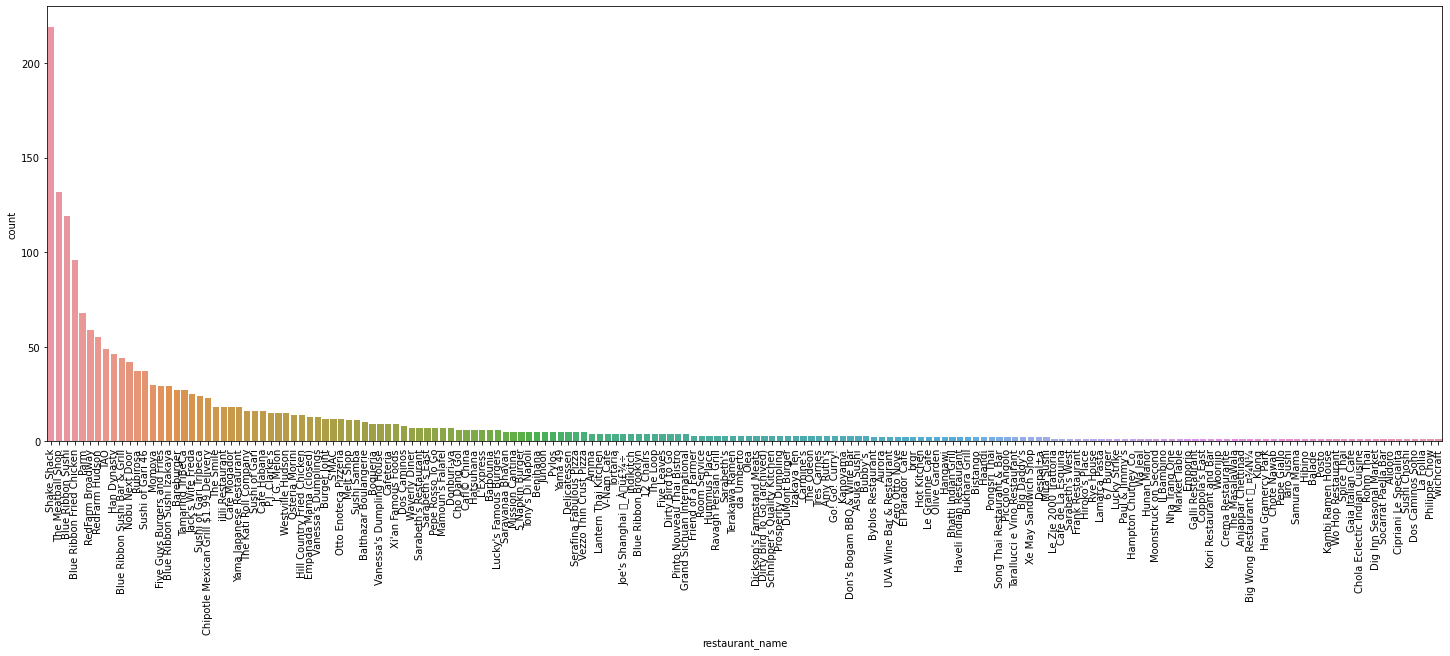

In [203]:
plt.figure(figsize=(25,8))
sns.countplot(data=df,x="restaurant_name",
             order=df['restaurant_name'].value_counts().index)
plt.xticks(rotation =90);

### Cuisine Type

In [204]:
df['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [205]:
df['cuisine_type'].nunique()

14

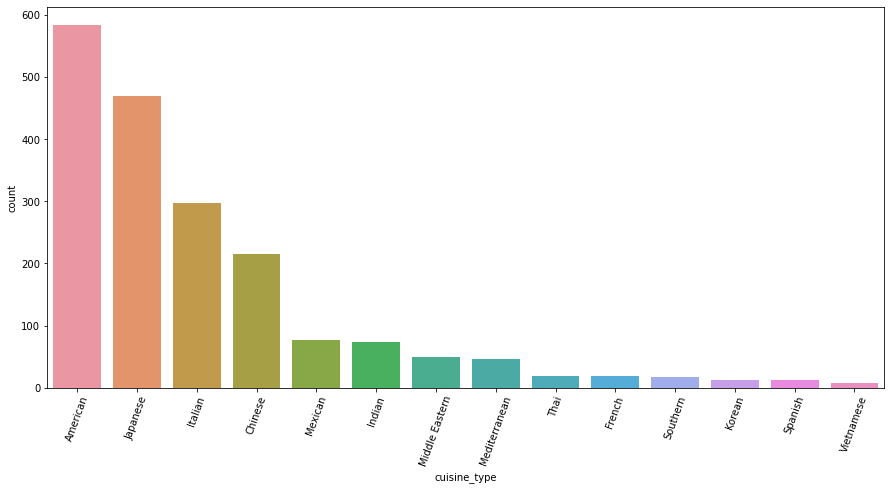

In [206]:
plt.figure(figsize=(15,7))
sns.countplot(x=df['cuisine_type'],
              order=df['cuisine_type'].value_counts().index)
plt.xticks(rotation=70);

### Cost of each order

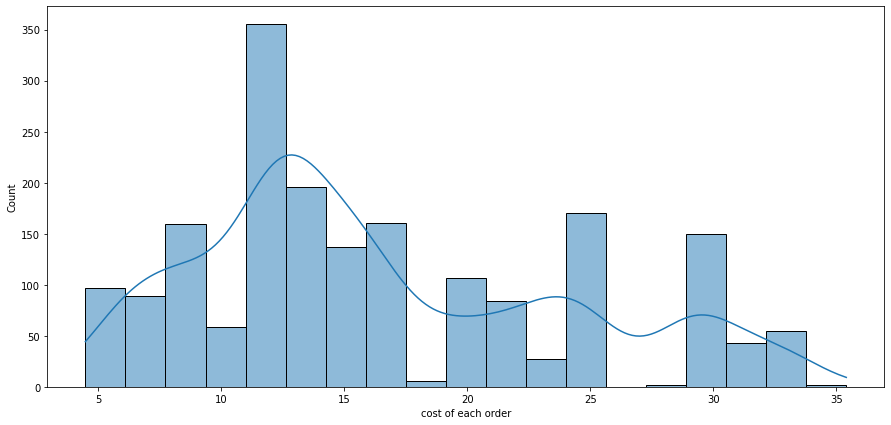

In [207]:
plt.figure(figsize=(15,7))
sns.histplot(data=df,x='cost_of_the_order',kde=True)
plt.xlabel('cost of each order');

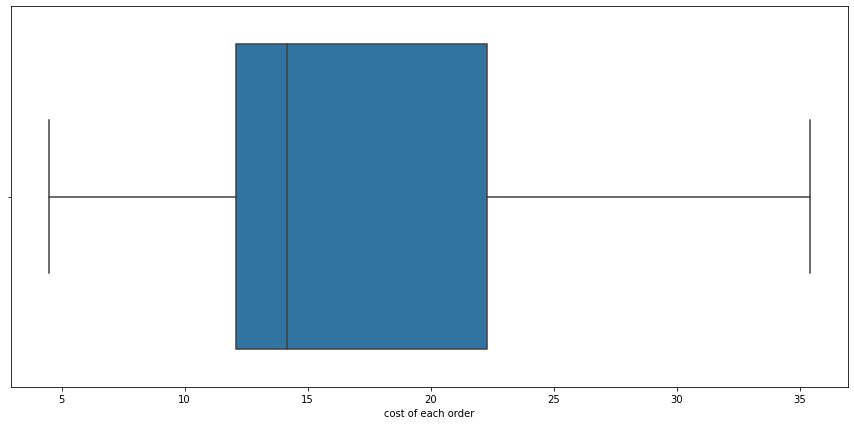

In [208]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x="cost_of_the_order")
plt.xlabel('cost of each order');

### When people order

In [209]:
df['day_of_the_week'].value_counts(normalize=True)

Weekend    0.711802
Weekday    0.288198
Name: day_of_the_week, dtype: float64

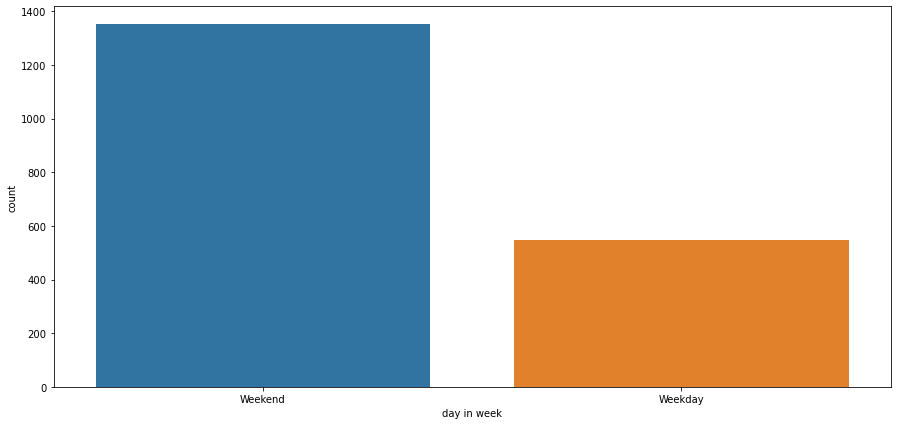

In [210]:
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='day_of_the_week')
plt.xlabel('day in week');

### Rating

In [211]:
df['rating'].value_counts(normalize=True)

Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: rating, dtype: float64

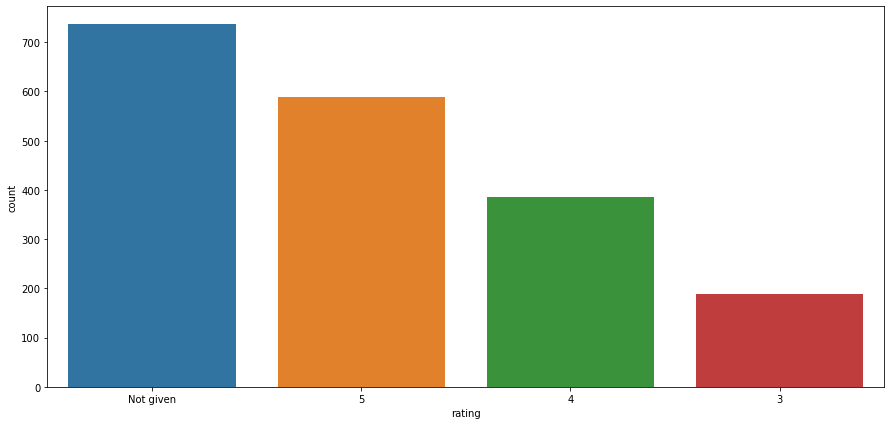

In [212]:
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='rating',
             order=df['rating'].value_counts().index);

### Preparation Time

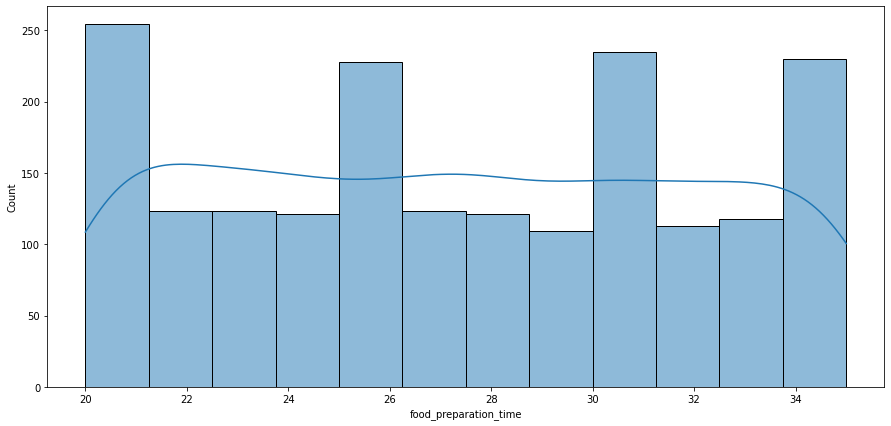

In [213]:
plt.figure(figsize=(15,7))
sns.histplot(data=df,x='food_preparation_time',kde=True);

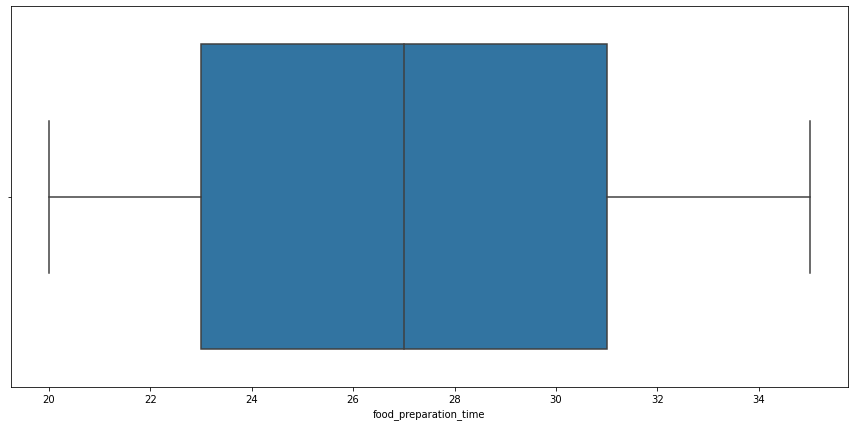

In [214]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='food_preparation_time');

### Delivery Time

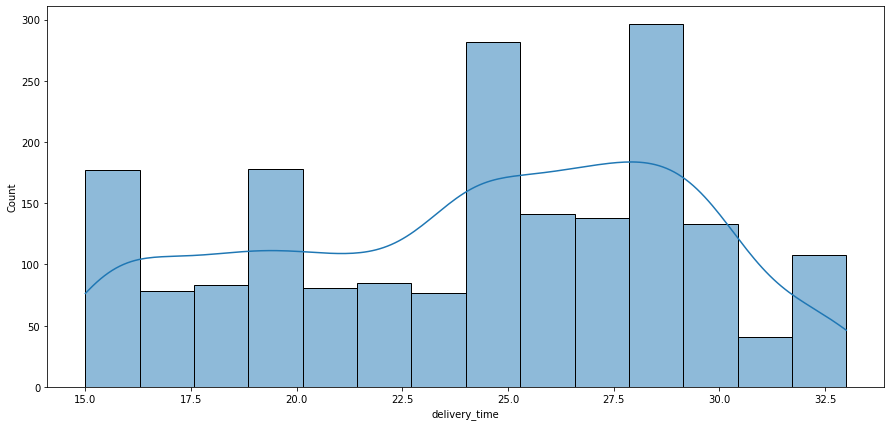

In [215]:
plt.figure(figsize=(15,7))
sns.histplot(data=df,x='delivery_time',kde=True);

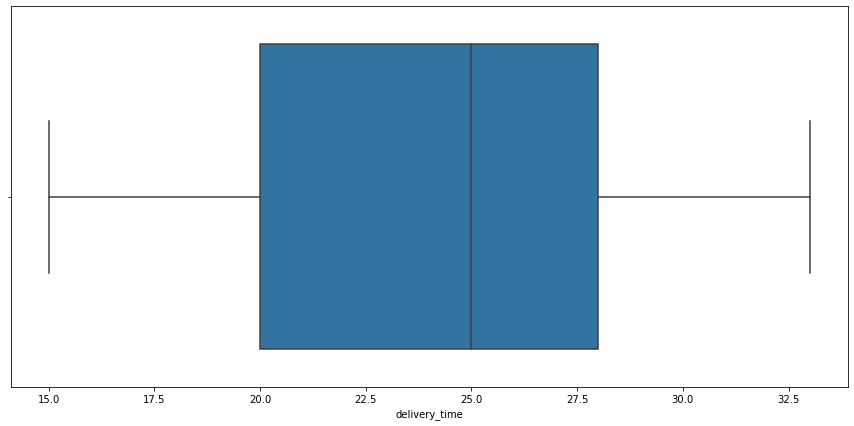

In [216]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='delivery_time');

## Observations
##### 1. There are 1898 unique order (doesn't make much sense)
##### 2. There are 1200 unique customer which means a lot of customer use this app repeatedly
##### 3. 178 unique restaurants exist in this dataset, shake shack is the most frequency restaurant that people order food
##### 4. 14 different type of cuisine around 178 restaurants, American type restaurant have the most number, Japanese type is the second
##### 5. Most of orders have cost between 10-15 (No outliers)
##### 6. Around 70% of orders are order during the weekend.
##### 7. Nearly 40% orders didn't get rating, around 30% get rating score '5', 20% get '4', 10% get '3'
##### 8. Most orders need 20-21min, 25-26min, 30-31min, 34min to prepare
##### 9. Most orders need 25-30min to delivery
##### 10. The distribution of  delivery time and food preparation time are very scattered and there is no central tendency

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [217]:
# Write the code here
df['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations: 
##### Shake Shack received the most orders (219)
##### The Meatball Shop Second (132)
##### Blue Ribbon Sushi Third (119)
##### Blue Ribbon Fried Chicken  Fourth (96)
##### Parm  Fifth (68)

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [218]:
weekend=df[df['day_of_the_week']=='Weekend']
weekend

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
11,1478437,221206,Empanada Mama (closed),Mexican,8.10,Weekend,5,23,22
...,...,...,...,...,...,...,...,...,...
1891,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19


In [219]:
weekend['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations: We can get the conclusion that the most popular cuisine type during weekend is American type.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [220]:
# Write the code here
More_than_20=df[df['cost_of_the_order']>20]
percentage=More_than_20.shape[0]/df.shape[0]
print('The percentage of the orders cost more than $20 is','%.1f%%'%(percentage*100))

The percentage of the orders cost more than $20 is 29.2%


#### Observations: Nearly 29% orders cost more than 20 dollars.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [221]:
# Write the code here
round(df['delivery_time'].sum()/df.shape[0],1)

24.2

#### Observations: It has already showed before from the df.describe() function, the mean delivery time is 24.16 min, but we can also calculate it by using function: mean(delivery time)=sum(delivery time)/count(id)


### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [222]:
# Write the code here
df['customer_id'].value_counts().head(5)

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

#### Observations: The ID of top 5 most frequent customers are 52832, 47440, 83287, 250494, 259341. Their corresponding order numbers are 13, 10, 9, 8, 7.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


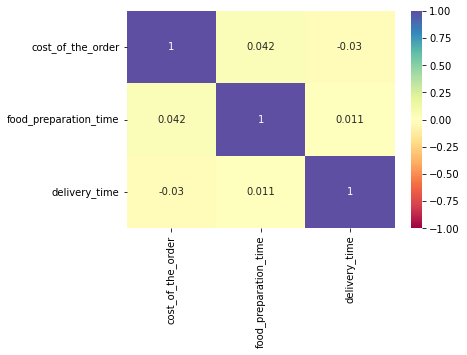

In [223]:
# Write the code here
corr=df[['cost_of_the_order','food_preparation_time','delivery_time']]
sns.heatmap(data=corr.corr(),annot=True, vmin=-1, vmax=1,
           cmap='Spectral');

### ★ There is no strong correlation between order price, food preparation time, and delivery time.

## Rating and Food Preparation Time

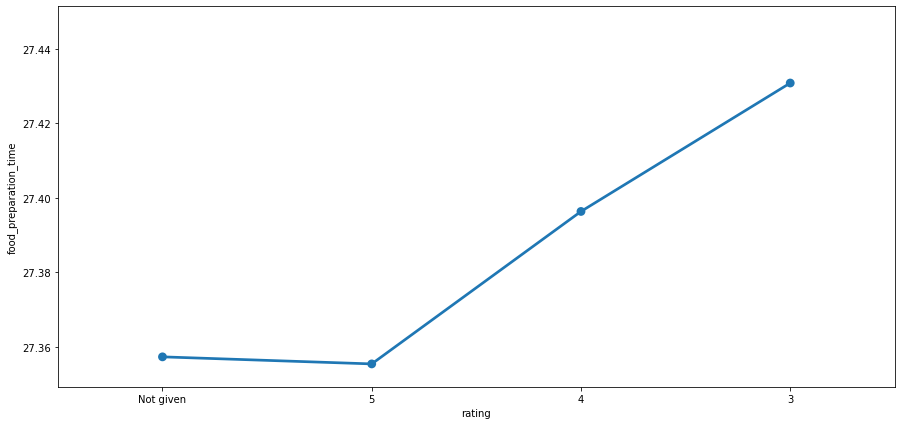

In [224]:
plt.figure(figsize=(15,7))
sns.pointplot(data=df,x='rating',y='food_preparation_time',order=df['rating'].value_counts().index,ci=False);

### ★ We can see that with the increase of the food prepare time, the rating score get decrease. However it's not significant due to the change of the food prepare time is too little.

## Rating and Delivery Time

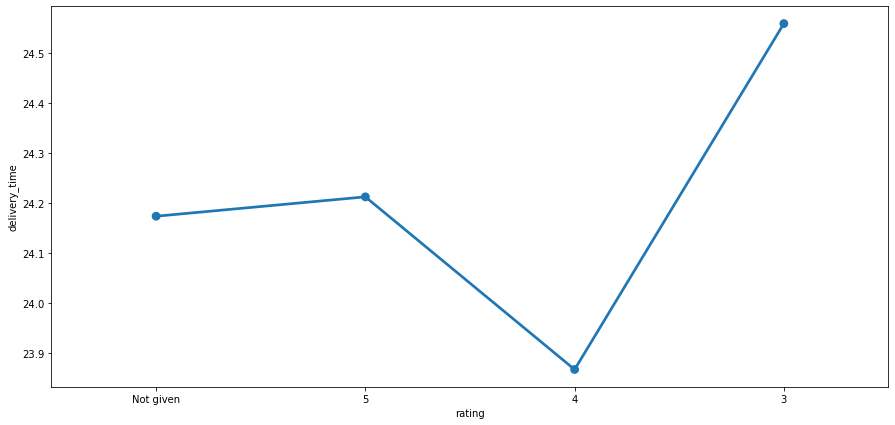

In [225]:
plt.figure(figsize=(15,7))
sns.pointplot(data=df,x='rating',y='delivery_time',order=df['rating'].value_counts().index,ci=False);

### ★ Foods rated 3 take longer to deliver than other ratings, but foods rated 5 take longer to deliver than those rated 4, and maybe there isn't a big difference between delivery time and rating strong relationship

## Rating and Cost of the Order

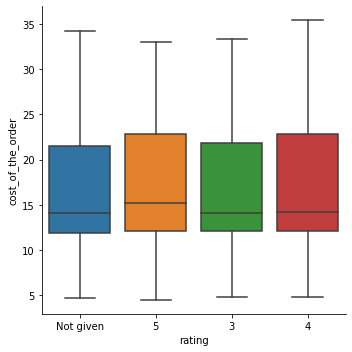

In [226]:
sns.catplot(data=df,x='rating',y='cost_of_the_order',kind='box');

## Different cuisine type & Cost 

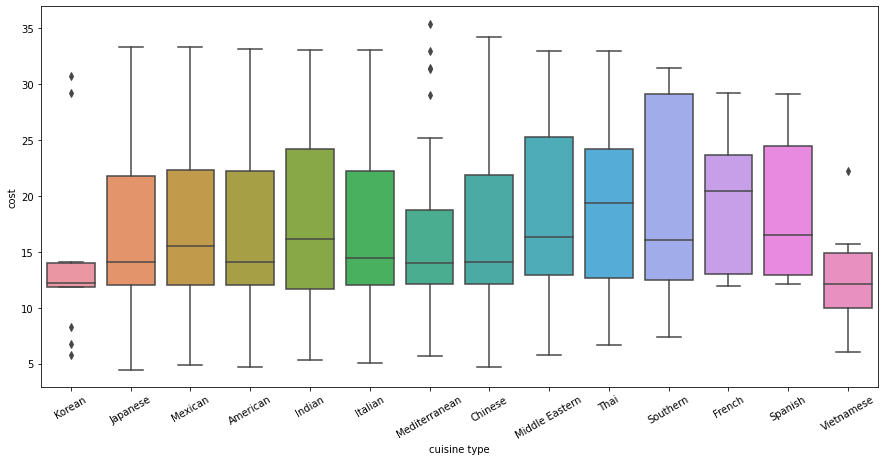

In [227]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='cuisine_type',y='cost_of_the_order')
plt.xticks(rotation = 30)
plt.xlabel('cuisine type')
plt.ylabel('cost');

## Average Cost of Different Cuisine Type 

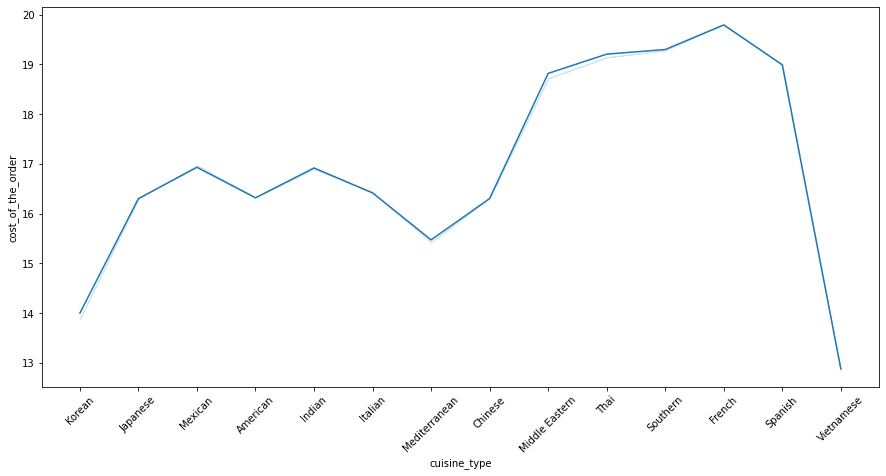

In [228]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x='cuisine_type', y='cost_of_the_order' , ci=0, estimator='mean')
plt.xticks(rotation=45);

### ★ According to this plot, we can know that the average cost of French type is the highest, Vietnamese has the lowest average cost.

## Different Day during the week & Preparation Time & Different Cuisine Type

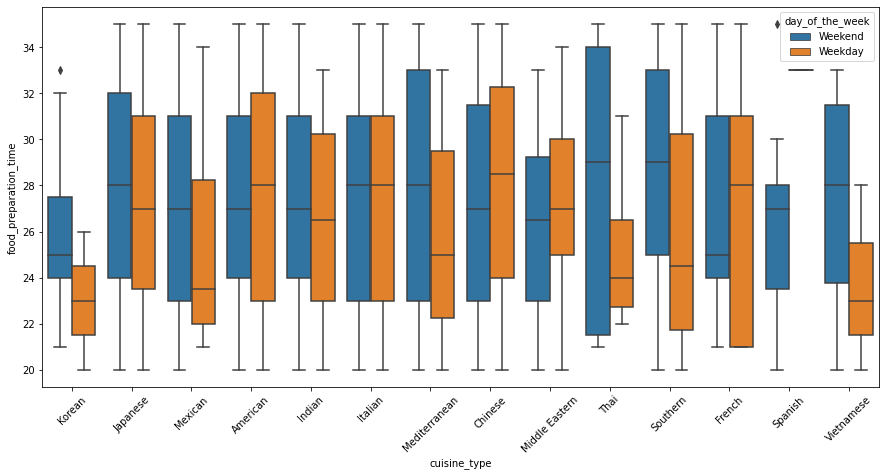

In [229]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='cuisine_type', y='food_preparation_time',hue='day_of_the_week')
plt.xticks(rotation=45);

In [230]:
 df.groupby(by=["cuisine_type"])["day_of_the_week"].sort_values()

cuisine_type    day_of_the_week
American        Weekend            415
                Weekday            169
Chinese         Weekend            163
                Weekday             52
French          Weekend             13
                Weekday              5
Indian          Weekend             49
                Weekday             24
Italian         Weekend            207
                Weekday             91
Japanese        Weekend            335
                Weekday            135
Korean          Weekend             11
                Weekday              2
Mediterranean   Weekend             32
                Weekday             14
Mexican         Weekend             53
                Weekday             24
Middle Eastern  Weekend             32
                Weekday             17
Southern        Weekend             11
                Weekday              6
Spanish         Weekend             11
                Weekday              1
Thai            Weekend         

### ★ All fourteen different types of restaurants had more orders on weekends than on weekdays, and from the boxplot we can see that ten types of restaurants had longer median prep times on weekends than they did on weekends. Meals are often prepared on weekdays. This is related to the fact that the number of orders on weekends is significantly higher than the number of orders on weekdays.

## Different Day during the week & Delivery Time & Different Cuisine Type

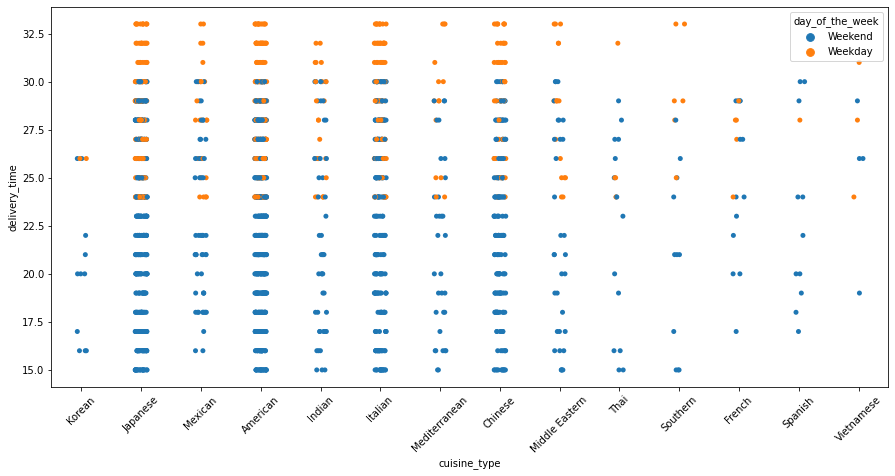

In [231]:
plt.figure(figsize=(15,7))
sns.stripplot(data=df,x='cuisine_type',y='delivery_time',hue='day_of_the_week',jitter=True)
plt.xticks(rotation=45);

In [232]:
df.groupby(['cuisine_type','day_of_the_week'])['delivery_time'].mean()

cuisine_type    day_of_the_week
American        Weekday            28.248521
                Weekend            22.542169
Chinese         Weekday            28.826923
                Weekend            22.269939
French          Weekday            27.200000
                Weekend            24.615385
Indian          Weekday            27.625000
                Weekend            22.346939
Italian         Weekday            28.802198
                Weekend            22.705314
Japanese        Weekday            28.133333
                Weekend            22.519403
Korean          Weekday            26.000000
                Weekend            20.000000
Mediterranean   Weekday            28.785714
                Weekend            21.312500
Mexican         Weekday            28.250000
                Weekend            22.641509
Middle Eastern  Weekday            28.470588
                Weekend            21.750000
Southern        Weekday            29.500000
                Weekend

### ★Regardless of the type of cuisine restaurant, the weekday delivery times for almost all orders are higher than the weekend delivery times, and the average weekday delivery times are all higher than weekend delivery times. This is easy to explain, as it is associated with higher traffic flow on weekdays, more prone to traffic jams, and longer delivery times.

## Top 5 cuisine type by sum of order price

In [233]:
df.groupby(by=['cuisine_type'])['cost_of_the_order'].sum().sort_values(ascending=False).head(5)

cuisine_type
American    9530.78
Japanese    7663.13
Italian     4892.77
Chinese     3505.62
Mexican     1303.85
Name: cost_of_the_order, dtype: float64

## Top 5 restaurant by sum of order price

In [234]:
df.groupby(by=['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending=False).head(5)

restaurant_name
Shake Shack                  3579.53
The Meatball Shop            2145.21
Blue Ribbon Sushi            1903.95
Blue Ribbon Fried Chicken    1662.29
Parm                         1112.76
Name: cost_of_the_order, dtype: float64

## Top 5 restaurant by average of order price

In [235]:
df.groupby(by=['restaurant_name'])['cost_of_the_order'].mean().sort_values(ascending=False).head(5)

restaurant_name
Kambi Ramen House      32.930
Emporio                31.430
Bhatti Indian Grill    31.115
Haru Gramercy Park     29.830
Lucky Strike           29.250
Name: cost_of_the_order, dtype: float64

### ★ The top five restaurants and cuisine types in the sum of the order price are exactly the same as the top five restaurants and cuisine types taking orders

## Calculates the average rating for restaurants that receive ratings

In [236]:
df_rating=df[df['rating'] != 'Not given']
df_rating

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
...,...,...,...,...,...,...,...,...,...
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3,33,30
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19


In [237]:
# change the type of 'rating' to number
df_rating['rating']=df_rating[['rating']].apply(pd.to_numeric)

/var/folders/cx/hks62b4j2kvd_vr_t3mw24fr0000gn/T/ipykernel_18870/1558491080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating['rating']=df_rating[['rating']].apply(pd.to_numeric)


In [238]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   int64  
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 90.8+ KB


In [239]:
round(df_rating.groupby(by=['cuisine_type'])['rating'].mean(),2).sort_values(ascending=False)

cuisine_type
Spanish           4.83
Thai              4.67
Indian            4.54
Mexican           4.42
Japanese          4.37
Italian           4.36
Chinese           4.34
Southern          4.31
American          4.30
French            4.30
Middle Eastern    4.24
Mediterranean     4.22
Korean            4.11
Vietnamese        4.00
Name: rating, dtype: float64

### ★ Based on the data we have, we can see that Spanish restaurants have the highest average ratings, followed by Thai and Indian restaurants

# Observation:
### ⸰ Ratings are often not significantly related to food preparation time or delivery times
### ⸰ The delivery time on weekdays is generally longer than that on weekends, which is related to the heavy traffic flow on weekdays and the easy traffic jams
### ⸰ Weekend meal preparation time is longer than weekday meal preparation time, because more orders are placed on weekends, restaurant staff will naturally take longer to prepare food
### ⸰ Analysis of restaurants that received ratings: Spanish type restaurants have the highest average scores

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [240]:
Count=df_rating.groupby(by=['restaurant_name'])['rating']c
Count.rename(columns={'rating':'number'},inplace=True)
Count.head()

,restaurant_name,number
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [241]:
Count50=Count[Count['number']>50]
Count50.head()

,restaurant_name,number
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64


In [242]:
Rated=df_rating.groupby(by=['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index()
Rated

,restaurant_name,rating
0,'wichcraft,5.0
1,Ravagh Persian Grill,5.0
2,Chola Eclectic Indian Cuisine,5.0
3,Chote Nawab,5.0
4,Junoon,5.0
...,...,...
151,Woorijip,3.0
152,Byblos Restaurant,3.0
153,Pepe Giallo,3.0
154,Sushi Choshi,3.0


In [243]:
Rated_greater_than_3 = Rated[Rated['rating']>4]
Rated_greater_than_3.head()

,restaurant_name,rating
0,'wichcraft,5.0
1,Ravagh Persian Grill,5.0
2,Chola Eclectic Indian Cuisine,5.0
3,Chote Nawab,5.0
4,Junoon,5.0


In [244]:
New = pd.merge(Count50,Rated_greater_than_3,how='inner',on='restaurant_name')
New

,restaurant_name,number,rating
0,Shake Shack,133,4.278195
1,The Meatball Shop,84,4.511905
2,Blue Ribbon Sushi,73,4.219178
3,Blue Ribbon Fried Chicken,64,4.328125


#### Observations: There are four restaurants that meet the above conditions, they are "Shake Shack", "The Meatball Shop", "Blue Ribbon Sushi	", "Blue Ribbon Fried Chicken"


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [245]:
def net_revenue(cost):
    if cost>20:
        return cost*0.25
    elif cost>5:
        return cost*0.15
    else:
        return cost*0

df['revenue'] = df['cost_of_the_order'].apply(net_revenue)

In [246]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [247]:
total_revenue=round(df['revenue'].sum(),1)
total_revenue

6166.3

In [248]:
df['cost_of_the_order'].sum()

31314.82

In [249]:
PERCENTAGE=round(total_revenue/df['cost_of_the_order'].sum(),4)
print('Company revenue accounts for', '%.2f%%' % (PERCENTAGE*100), 'of total restaurant orders')

Company revenue accounts for 19.69% of total restaurant orders


#### Observations: So the net revenue is $6166.3
#### This is equivalent to nearly 20% of the total restaurant order


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [250]:
# Write the code here
df['total_time']=df['food_preparation_time']+df['delivery_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,49


In [251]:
df_greater_than_60 = df[df['total_time']>60]
df_greater_than_60.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue,total_time
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,0.8955,63
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,Not given,34,28,0.8880,62
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.20,Weekend,4,35,26,2.4300,61
24,1476714,363783,Cafe Mogador,Middle Eastern,15.86,Weekday,Not given,32,29,2.3790,61
54,1477760,130507,Jack's Wife Freda,Mediterranean,22.75,Weekend,3,35,29,5.6875,64


In [252]:
percentage_of_greater_than_60 = df_greater_than_60.shape[0]/df.shape[0]
percentage=round(percentage_of_greater_than_60,3)
print('the percentage of the time greater than 60min is','%.1f%%' % (percentage*100))

the percentage of the time greater than 60min is 10.5%


#### Observations: The percentage of the total time greater than 60 minutes is 10.5%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [253]:
# Write the code here
average_time_weekend=round(df[df['day_of_the_week']=='Weekend']['delivery_time'].mean(),2)
print('the average delivery time during the weekend is', average_time_weekend, 'minutes')

the average delivery time during the weekend is 22.47 minutes


In [254]:
average_time_weekday=round(df[df['day_of_the_week']=='Weekday']['delivery_time'].mean(),2)
print('the average delivery time during the weekday is', average_time_weekday, 'minutes')

the average delivery time during the weekday is 28.34 minutes


#### Observations: In the previous analysis, it has been known that the delivery time of most weekday orders is longer than that of weekend orders. Here, we can draw a more precise conclusion that the average delivery time on weekdays is longer than the average delivery time on weekends. Almost 6 minutes long

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* The Top5 popular cuisine type in New York are American, Japanese, Italian, Chinese and Mexican, this 5 types restaurants also received top5 orders.  
* Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fired Chicken and Parm are the top5 restaurants that recived most orders and earned most.
* It seems that rating has no relationship with delivery time, food preparation time or the cost of the food, it's probably because this three variables(delivery time, preparation time and cost) did not change much. Maybe the rating related to the taste and quality of the food.
* According to previous analyze, restaurant need more time to prepare the food during the weekend than weekday, because there are more orders during weekend, however the delivery staff need more time to delivery food on weekdays, due to the more cars on the road on weekdays, food delivery needs more time.
* According to the company's current charging standard, the company's revenue is nearly 6,200 US dollars, which is nearly 20% of the total restaurant order revenue. Over 29% orders cost more than $20.
* The maximum number of times the company's app was reused was 13.

### Recommendations:

* Companies should use some marketing strategies or advertisements to increase the number of ordering meals using the app on weekdays, such as placing company advertisements in office buildings to attract more workers to use the app to order meals on weekdays.
* Increase user stickiness, allow more users to use the app repeatedly to order meals, for instance, increase the exposure of the product in front of users through email or text message prompts, or providing cash coupons to users which can stimulate them to use app.
* Increase promotions, such as getting a $2 voucher for orders over $30, or encouraging users to group buying to increase the amount of a single order and increase the company's profit from the order.
* Also, advertise on restaurants that have more than 50 reviews and an average rating above 4. These restaurants are: shake shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken. Not only are these restaurants high traffic, but their food is more popular (higher ratings), and the company advertises at these restaurants can get more exposure for the product.
* Increase brand awareness, let more restaurants to use this app, recruit more delivery staff, and increase customer ratings for delivery staff in the app. Both of these methods can shorten the total time (preparation time + delivery time), and the customer's rating on the delivery staff can prompt the delivery staff to deliver the order to the destination as soon as possible after receiving the order prepared by the restaurant. Although there is currently no significant relationship between time and ratings, in my experience in China, people value food preparation time and delivery time as much as food quality. If the company can reduce the total time through the above methods, it will allow the app to occupy more market.

---